<a href="https://colab.research.google.com/github/daminiKor18/2021173/blob/main/Handwritten_character_regognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d suvooo/hindi-character-recognition

 93% 71.0M/76.1M [00:00<00:00, 130MB/s] 
100% 76.1M/76.1M [00:00<00:00, 111MB/s]


In [ ]:
import zipfile
zip_ref= zipfile.ZipFile('/content/hindi-character-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import  Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/DevanagariHandwrittenCharacterDataset/Train',
    labels = 'inferred',
    label_mode= 'categorical',
    batch_size=32,
    image_size=(64,64)
)
validation_ds=  keras.utils.image_dataset_from_directory(
    directory ='/content/DevanagariHandwrittenCharacterDataset/Test',
    labels = 'inferred',
    label_mode= 'categorical',
    batch_size=32,
    image_size=(64,64)
)

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [ ]:
#Normalize
def process(image,label):
   image = tf.cast(image/255. ,tf.float32)
   return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(46,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
from tensorflow.keras import layers, models,optimizers

In [ ]:
custom_learning_rate = 0.001
opt = optimizers.Adam(learning_rate=custom_learning_rate)


In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
2444/2444 [==============================] - 35s 12ms/step - loss: 0.6249 - accuracy: 0.8207 - val_loss: 0.1854 - val_accuracy: 0.9457
Epoch 2/10
2444/2444 [==============================] - 29s 12ms/step - loss: 0.1854 - accuracy: 0.9447 - val_loss: 0.1099 - val_accuracy: 0.9678
Epoch 3/10
2444/2444 [==============================] - 28s 11ms/step - loss: 0.1221 - accuracy: 0.9637 - val_loss: 0.1195 - val_accuracy: 0.9690
Epoch 4/10
2444/2444 [==============================] - 26s 11ms/step - loss: 0.0944 - accuracy: 0.9719 - val_loss: 0.1033 - val_accuracy: 0.9719
Epoch 5/10
2444/2444 [==============================] - 28s 11ms/step - loss: 0.0787 - accuracy: 0.9764 - val_loss: 0.1003 - val_accuracy: 0.9752
Epoch 6/10
2444/2444 [==============================] - 27s 11ms/step - loss: 0.0693 - accuracy: 0.9798 - val_loss: 0.0864 - val_accuracy: 0.9808
Epoch 7/10
2444/2444 [==============================] - 26s 11ms/step - loss: 0.0579 - accuracy: 0.9828 - val_loss: 0.0782 -

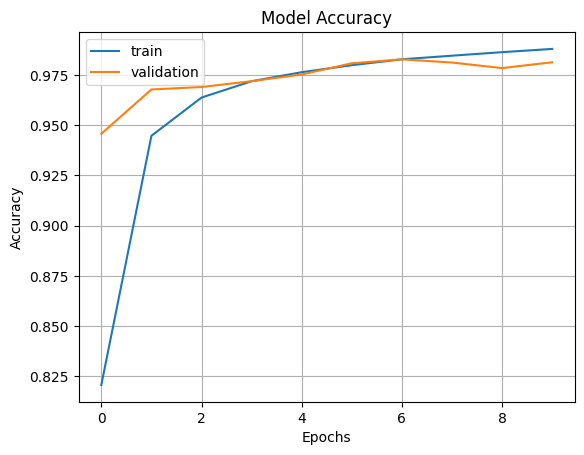

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

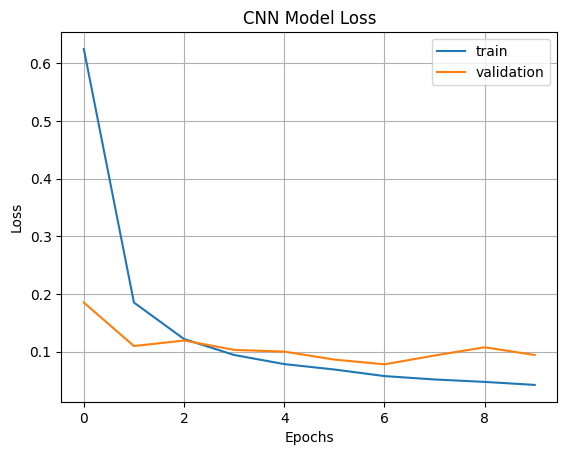

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#HERE I HAVE SPECIFIED THE CLASS NAMES PRESENT IN THE TRAIN DIRECTORY
import os

dataset_directory = '/content/DevanagariHandwrittenCharacterDataset/Train'

class_names = os.listdir(dataset_directory)
print(class_names)

['digit_5', 'character_33_ha', 'digit_0', 'character_1_ka', 'character_18_da', 'character_25_ma', 'digit_8', 'character_13_daa', 'digit_6', 'character_16_tabala', 'character_34_chhya', 'digit_2', 'character_23_ba', 'digit_1', 'character_26_yaw', 'character_7_chha', 'character_29_waw', 'character_31_petchiryakha', 'character_12_thaa', 'character_19_dha', 'character_28_la', 'character_11_taamatar', 'character_21_pa', 'character_5_kna', 'character_4_gha', 'character_10_yna', 'character_30_motosaw', 'character_35_tra', 'character_32_patalosaw', 'character_3_ga', 'character_27_ra', 'character_17_tha', 'digit_4', 'digit_9', 'character_6_cha', 'character_9_jha', 'character_24_bha', 'character_20_na', 'character_8_ja', 'digit_7', 'character_2_kha', 'character_14_dhaa', 'character_22_pha', 'digit_3', 'character_36_gya', 'character_15_adna']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_path ='/content/model.h5'

In [ ]:
# Load the model
model = load_model(model_path)

# Predictions and evaluation on the validation set
predictions = model.predict(validation_ds)
predicted_labels = plt.np.argmax(predictions, axis=1)
validation_loss, validation_accuracy = model.evaluate(validation_ds)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

432/432 [==============================] - 3s 6ms/step - loss: 0.0944 - accuracy: 0.9813
Validation Accuracy: 98.13%


In [ ]:
y_true = plt.np.concatenate([y for x, y in validation_ds], axis=0)

In [ ]:
predictions = model.predict(validation_ds)
predicted_labels = plt.np.argmax(predictions, axis=1)

432/432 [==============================] - 4s 9ms/step


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_labels=[]
predicted_labels=[]
for images,labels in validation_ds:
  predicted_labels_batches=model.predict(images)
  predicted_labels_batches=tf.argmax(predicted_labels_batches,axis=1)
  test_labels.append(labels.numpy())
  predicted_labels.append(predicted_labels_batches.numpy())
test_labels=np.concatenate(test_labels)
predicted_labels=np.concatenate(predicted_labels)

if len(test_labels.shape)>1:
  test_labels=np.argmax(test_labels,axis=1)

confusion_mat=confusion_matrix(test_labels,predicted_labels)
print('Confusion matrix:')
print(confusion_mat)

precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print('classification_Report:')
print(classification_report(test_labels,predicted_labels))

1/1 [==============================] - 0s 109ms/step
Confusion matrix:
[[285   0   0 ...   0   0   0]
 [  0 290   1 ...   0   1   0]
 [  0   0 290 ...   0   0   0]
 ...
 [  0   0   0 ... 299   0   0]
 [  0   0   0 ...   0 300   0]
 [  0   0   0 ...   0   1 298]]
Precision: 0.9816
Recall: 0.9813
F1 Score: 0.9813
classification_Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       300
           1       1.00      0.97      0.98       300
           2       1.00      0.97      0.98       300
           3       0.98      1.00      0.99       300
           4       0.98      0.98      0.98       300
           5       0.98      1.00      0.99       300
           6       0.98      0.98      0.98       300
           7       0.96      0.97      0.97       300
           8       0.96      0.96      0.96       300
           9       0.98      0.97      0.98       300
          10       0.99      0.99      0.99       300
          11   

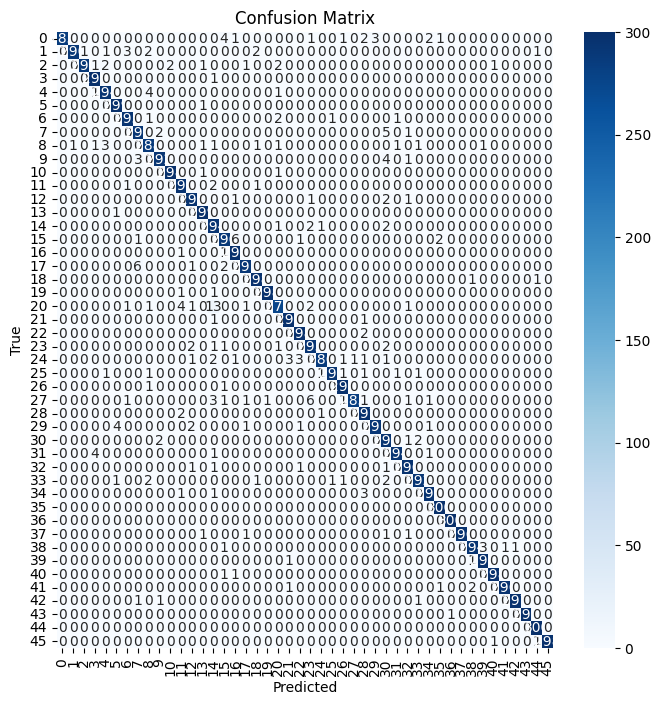

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Define class names
class_names = [str(i) for i in range(46)]

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/img.png')

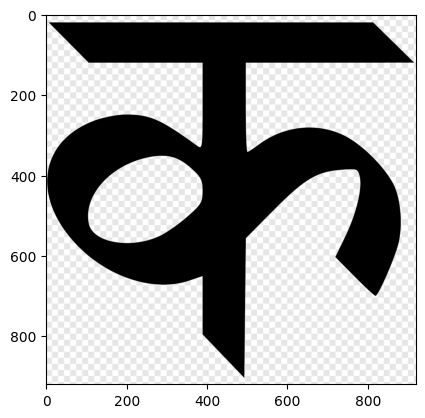

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape
test_img=cv2.resize(test_img,(64,64))

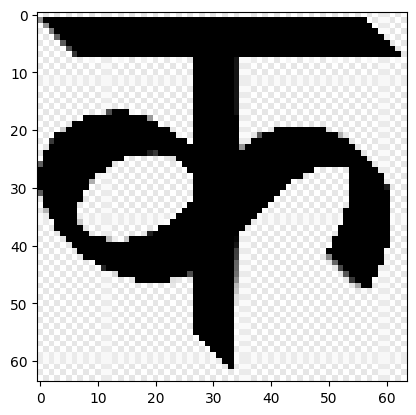

In [ ]:
plt.imshow(test_img)

In [ ]:
test_input=test_img.reshape((1,64,64,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 319ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
predict_array = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Obtain class labels are-
class_labels = ['character_14_dhaa', 'digit_8', 'character_29_waw', 'digit_6', 'character_12_thaa', 'character_20_na', 'character_36_gya', 'character_13_daa', 'character_28_la', 'character_2_kha', 'digit_7', 'character_26_yaw', 'character_21_pa', 'digit_0', 'digit_3', 'character_17_tha', 'character_24_bha', 'character_18_da', 'character_30_motosaw', 'character_25_ma', 'character_31_petchiryakha', 'character_1_ka', 'character_10_yna', 'character_4_gha', 'character_33_ha', 'character_32_patalosaw', 'character_35_tra', 'character_27_ra', 'character_15_adna', 'digit_5', 'digit_9', 'character_8_ja', 'character_19_dha', 'character_5_kna', 'character_11_taamatar', 'character_34_chhya', 'character_3_ga', 'digit_2', 'character_16_tabala', 'character_6_cha', 'digit_1', 'character_22_pha', 'character_7_chha', 'digit_4', 'character_9_jha', 'character_23_ba']

# Finding the index with the highest probability
predict_index = np.argmax(predict_array)

# Get the corresponding predicted class label
predict_class = class_labels[predict_index]

print(f"The predicted class is: {predict_class}")


The predicted class is: character_1_ka
